In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 
methods = ["SafeBound", "Postgres", "Postgres2D", "BayesCard", "NeuroCard"]

buildTimeResults = pd.DataFrame()
rootFileDirectory = "/home/ec2-user/FrequencyBounds/Data/Results/"
for method in methods:
    try:
        resultFile = rootFileDirectory + method + "_Build_Results.csv"
        resultData = pd.read_csv(resultFile)
        resultData["Method"] = method
        resultData["Size"] /= 1000000
        buildTimeResults = pd.concat([buildTimeResults, resultData], ignore_index=True)
    except:
        print("No Data For " + method + " on " + benchmark)

In [17]:
NeuroCardBuildTimes = {'JOBM' : 17178.7,
                      'JOBLight': 2010.10,
                      'JOBLightRanges' : 3612.35}

In [18]:
buildTimeResults = buildTimeResults[((buildTimeResults["Method"].isin(["Postgres", "Postgres2D"]))&
                                     (buildTimeResults["Run"]==2))|
                                    ((buildTimeResults["Method"].isin(["SafeBound"]))&
                                     (buildTimeResults["Run"]==4))|
                                    (~buildTimeResults["Method"].isin(["Postgres", "Postgres2D", "SafeBound"]))]

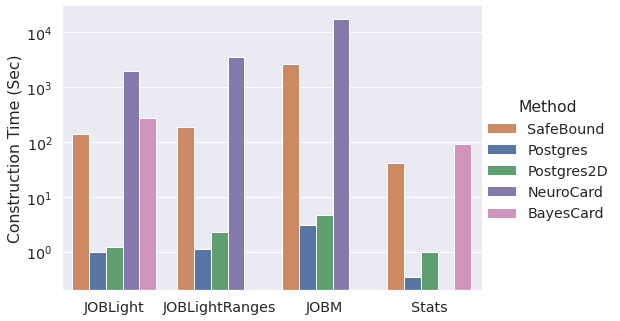

In [57]:
palette = ["C1", "C0", "C2", "C4", "C6"]
hueOrder = ["SafeBound", "Postgres", "Postgres2D", "NeuroCard", "BayesCard"]
sn.set_style("whitegrid")
sn.set_color_codes("pastel")
sn.set(font_scale = 1.3)
runtimePlot = sn.catplot(y="BuildTime", x="Benchmark", hue="Method", height=5, aspect=6/4, data= buildTimeResults, order=["JOBLight", "JOBLightRanges", "JOBM", "Stats"],palette=palette, hue_order=hueOrder, kind='bar')
runtimePlot.set(ylabel="Construction Time (Sec)", xlabel='')
plt.yscale("log")

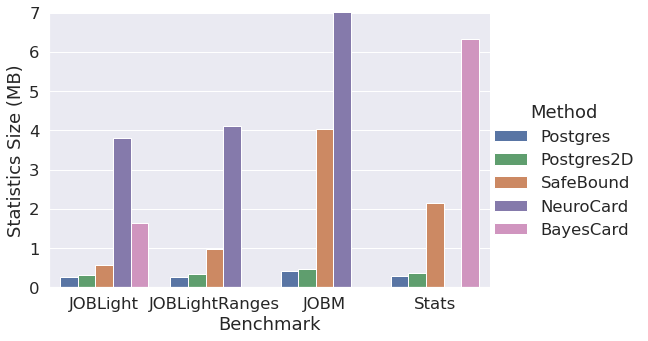

In [56]:
palette = ["C0", "C2","C1", "C4", "C6"]
hueOrder = ["Postgres", "Postgres2D","SafeBound", "NeuroCard", "BayesCard"]
sn.set(rc={'figure.figsize':(14,6)})
sn.set_style("whitegrid")
sn.set_color_codes("pastel")
sn.set(font_scale = 1.5)
runtimePlot = sn.catplot(y="Size", x="Benchmark", hue="Method", height=5, aspect=6/4, data= buildTimeResults, order=["JOBLight", "JOBLightRanges", "JOBM", "Stats"],palette=palette, hue_order=hueOrder, kind='bar')
runtimePlot.set(ylabel="Statistics Size (MB)", xlabel='Benchmark', ylim=[0,7])
plt.yscale("linear")

In [63]:
both = buildTimeResults[buildTimeResults["Method"]=="SafeBound"].merge(buildTimeResults[buildTimeResults["Method"]=="NeuroCard"], on='Benchmark', suffixes=["","_NeuroCard"])

In [65]:
both["BuildTime_NeuroCard"]/both["BuildTime"]

0    14.551754
1    19.433951
2     6.578816
dtype: float64